# Exploratory work for JOW
## based on the Facebook Insights on the page from 01/01/2019 up to 12/02/2020
 

In [10]:
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import random 
import sys
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(6,4)})

directory = "C:/Users/lfiorentini/TequilaRapido/JOW/Data/FB/page"
directory_img = "C:/Users/lfiorentini/TequilaRapido/JOW/Data/FB/page/img"
directory_csv = "C:/Users/lfiorentini/TequilaRapido/JOW/Data/FB/page/csv"
file1 = "key_Jan_May_19.csv"
file2 = "key_Jun_Oct_19.csv"
file3 = "key_Nov_Feb_20.csv"
feat_str = 1

## Upload data and concatenate different files
* remove line 1 which is the description of the header
* remove features with only NaN in one file
* remove rows with only NaN for each file
* reduce to common headers to all the files

In [5]:
headers = pd.read_csv(os.path.join(directory, file1), header=0, nrows = 1)#, converters = conver_dict)
type_dict = {}
for i in range(len(headers.columns)):
    if i < feat_str: 
        type_dict[headers.columns[i]] = str
    else:
        type_dict[headers.columns[i]] = np.float64 #we need float to deal with all the NaN
Data1 = pd.read_csv(os.path.join(directory, file1), header=0, skiprows = [1], dtype = type_dict)
Data2 = pd.read_csv(os.path.join(directory, file2), header=0, skiprows = [1], dtype = type_dict)
Data3 = pd.read_csv(os.path.join(directory, file3), header=0, skiprows = [1], dtype = type_dict)

Data1.dropna(axis = 1, how='all', inplace=True)
Data2.dropna(axis = 1, how='all', inplace=True)
Data3.dropna(axis = 1, how='all', inplace=True)

#print(len(Data1.columns))
#print(len(Data2.columns))
#print(len(Data3.columns))

common_head = list(set(Data1.columns) & set(Data2.columns) & set(Data3.columns))
len(common_head)

def remove_not_common(Data, common):
    for i in Data.columns:
        if i not in common_head:
            Data.drop(i, axis = 1, inplace = True)

remove_not_common(Data1, common_head)
remove_not_common(Data2, common_head)
remove_not_common(Data3, common_head)

#print(len(Data1.columns))
#print(len(Data2.columns))
#print(len(Data3.columns))

Data_f = pd.concat([Data1, Data2, Data3], sort=True)
Data_f.reset_index(drop = True, inplace = True)

In [6]:
Data_f.fillna(value = 0.0, inplace = True)
Data_f.head()

,28 Days Auto-Played 30-Second Views,28 Days Negative Feedback,28 Days Negative Feedback From Users,28 Days Organic Reach,28 Days Organic Reach of Page posts,28 Days Organic impressions,28 Days Organic impressions of your posts,28 Days Page Consumptions,28 Days Page Engaged Users,28 Days Paid Impressions,...,Weekly Total Unique Video Views,Weekly Total Video Views,Weekly Total website click count per Page,Weekly Total website click count per Page.1,Weekly Total: total action count per Page,Weekly Video Repeats,Weekly Viral Impressions Of Your Posts,Weekly Viral Reach,Weekly Viral Reach Of Page Posts,Weekly Viral impressions
0,29628.0,36.0,43.0,72972.0,72756.0,349792.0,347992.0,120366.0,145036.0,11597864.0,...,68276.0,72872.0,0.0,0.0,0.0,4596.0,63550.0,37588.0,37530.0,63608.0
1,29873.0,36.0,43.0,76427.0,76310.0,358655.0,356837.0,121550.0,148686.0,11708067.0,...,68519.0,73585.0,0.0,0.0,0.0,5066.0,68868.0,40538.0,40470.0,68899.0
2,29987.0,38.0,44.0,76595.0,76478.0,366216.0,364385.0,121984.0,151514.0,11497831.0,...,68682.0,73613.0,0.0,0.0,0.0,4931.0,71715.0,41878.0,41805.0,71748.0
3,30077.0,38.0,44.0,75696.0,75582.0,363124.0,361284.0,120333.0,153620.0,10559553.0,...,68552.0,73937.0,0.0,0.0,0.0,5385.0,73375.0,42576.0,42501.0,73414.0
4,30137.0,38.0,42.0,75451.0,75337.0,361022.0,359197.0,118878.0,153682.0,9939866.0,...,68676.0,74039.0,0.0,0.0,0.0,5363.0,63795.0,36720.0,36664.0,63835.0


In [7]:
from datetime import datetime

def working_day(date_str):
    try:
        day_code = datetime.strptime(date_str, '%m/%d/%y')
    except ValueError as e:
        print('StrError:', date_str)
        #print('ValueError:', e)
    day_code = day_code.weekday()
    return day_code != 0 and day_code != 6

def get_timestamp(date_str):
    return datetime.timestamp(datetime.strptime(date_str, '%m/%d/%y'))

Data_f['timestamp'] = Data_f['Date'].apply(get_timestamp)
Data_f['working_day'] = Data_f['Date'].apply(working_day)
Data_f.drop('Date', axis=1, inplace=True)

In [8]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return [m-h, m, m+h]

def intersection_confidence_interval(int_1, int_2):
    new_min = max(int_1[0],int_2[0])
    new_max = min(int_1[2],int_2[2])
    return [new_min, new_max]

def test_same_mean(data_1, data_2, confidence=0.95):
    int_1 = mean_confidence_interval(data_1, confidence=confidence)
    int_2 = mean_confidence_interval(data_2, confidence=confidence)
    new_int = intersection_confidence_interval(int_1, int_2)
    return new_int[0] < new_int[1]

## KPI for the matrices
This short session is about obtaining the KPI for the Renault matrix

In [9]:
# function that extract from a dataset only the elements between two dates
def campaign_selection(dataset, first_day, last_day):
    first_timestamp = datetime.timestamp(datetime.strptime(first_day, '%m/%d/%y'))
    last_timestamp = datetime.timestamp(datetime.strptime(last_day, '%m/%d/%y'))
    res = dataset[(dataset['timestamp'] >= first_timestamp) & (dataset['timestamp'] <= last_timestamp)].copy()
    return res

def KPI_dict_FB(data, with_marge, confidence = 0.95):
    index_IC = 1
    if with_marge:
        index_IC = 0
    dict_FB = {
       'Total post': data.shape[0],
    }
    for k in dict_FB.keys():
        print(k, dict_FB[k])
    return dict_FB

#december = campaign_selection(Data_f, '12/01/2019 01:00:00 AM', '12/31/2019 11:00:00 PM')
conf = 0.95
print('Total')
KPI_dict_FB(Data_f, with_marge = True, confidence = conf)
print('Done')


Total
Total post 408
Done


In [8]:
from datetime import datetime

tequila_data = campaign_selection(Data_f, '05/01/19', '12/31/20')

for col in tequila_data.columns:
    if col != 'Date' and '28' in col:
        print(col, tequila_data[col].mean())

28 Days Page Engaged Users 33958.5
28 Days Total Reach 963904.1363636364
28 Days Organic Reach 128951.78787878787
28 Days Paid Reach 826403.428030303
28 Days Viral Reach 69812.93939393939
28 Days Total Impressions 1604313.4128787878
28 Days Organic impressions 372932.6022727273
28 Days Paid Impressions 1216492.1325757576
28 Days Viral impressions 109043.27651515152
28 Days Reach Of Page Posts 952189.7462121212
28 Days Organic Reach of Page posts 123256.60227272728
28 Days Paid Reach of Page posts 826403.428030303
28 Days Viral Reach Of Page Posts 64703.83712121212
28 Days Total Impressions of your posts 1574995.8446969697
28 Days Organic impressions of your posts 358503.95075757575
28 Days Paid impressions of your posts 1216492.0
28 Days Viral Impressions Of Your Posts 99882.11742424243
28 Days Total Consumers 30024.492424242424
28 Days Page Consumptions 40893.54924242424
28 Days Negative Feedback 56.196969696969695
28 Days Negative Feedback From Users 73.18560606060606
28 Days Total O

In [12]:
Q1 = Data_f.corr()

print(Data_f.shape)
print(Q1.shape)
pict1_html = 'Global_corr.html'

Html_file= open(os.path.join(directory_img, pict1_html),"w")
Html_file.write(Q1.style.background_gradient(cmap='coolwarm').render())
Html_file.close()


(408, 106)
(106, 106)


<function TextIOWrapper.close()>

In [76]:
corr_thres = 0.95
# we keep a lower threshold w.r.t. the analysis of posts cause we have a higher number of features
# and we want to remove a lot of them

keys_to_preserve = ['28 Days Total Reach', 'Weekly Total Reach', 'Daily Total Reach',
                    '28 Days Paid Reach', 'Weekly Paid Reach', 'Daily Paid Reach',
                    '28 Days Organic Reach', 'Weekly Organic Reach', 'Daily Organic Reach',
                    '28 Days Negative Feedback', 'Weekly Negative Feedback', 'Daily Negative Feedback',
                    '28 Days Viral Reach', 'Weekly Viral Reach', 'Daily Viral Reach',
                    '28 Days Page Consumptions', 'Weekly Page Consumptions', 'Daily Page Consumptions',
                    'Daily Logged-in Page Views', 'Daily Total website click count per Page', 'Weekly Logged-in Page Views',
                    'Weekly Total website click count per Page'
                   ]
dict_to_drop = {key: special_key for special_key in keys_to_preserve
                   for key in Q1[special_key].keys() if Q1[special_key][key] > corr_thres and key not in keys_to_preserve}
Data_reduced = Data_f.drop(dict_to_drop.keys(), axis = 1)

KeyError: 'Weekly Paid Reach'

In [77]:
dict_to_drop

{'28 Days Auto-Played 30-Second Views': '28 Days Page Consumptions',
 '28 Days Organic Reach of Page posts': '28 Days Viral Reach',
 '28 Days Organic impressions': '28 Days Page Consumptions',
 '28 Days Organic impressions of your posts': '28 Days Page Consumptions',
 '28 Days Page Engaged Users': '28 Days Page Consumptions',
 '28 Days Reach Of Page Posts': '28 Days Viral Reach',
 '28 Days Total 30-Second Views': '28 Days Page Consumptions',
 '28 Days Total Auto-Played Views': '28 Days Viral Reach',
 '28 Days Total Consumers': '28 Days Page Consumptions',
 '28 Days Total Impressions': '28 Days Viral Reach',
 '28 Days Total Impressions of your posts': '28 Days Viral Reach',
 '28 Days Total Organic 30-Second Views': '28 Days Page Consumptions',
 '28 Days Total Organic Views': '28 Days Page Consumptions',
 '28 Days Total Unique 30-Second Views': '28 Days Page Consumptions',
 '28 Days Total Unique Video Views': '28 Days Viral Reach',
 '28 Days Total Video Views': '28 Days Page Consumptions


for all measures of time we can see that the Reach and Impression are highly correlated and they depend on their posts
furthermore, once we increase the time interval the total reach is correlated to more features like:
* the organic performances
* views and the number of engaged users
Viral elements are correlated as well


In [78]:
Q2 = Data_reduced.corr()

pict2_html = 'reduced_corr.html'

Html_file= open(os.path.join(directory_img, pict2_html),"w")
Html_file.write(Q2.style.background_gradient(cmap='coolwarm').render())
Html_file.close()

Data_reduced.columns

Index(['28 Days Negative Feedback', '28 Days Organic Reach',
       '28 Days Page Consumptions', '28 Days Paid Reach',
       '28 Days Paid impressions of your posts', '28 Days Total Reach',
       '28 Days Viral Reach', 'Daily Logged-in Page Views',
       'Daily Negative Feedback', 'Daily New Likes', 'Daily Organic Reach',
       'Daily Page Consumptions', 'Daily Total 30-Second Repeats',
       'Daily Total Reach', 'Daily Total website click count per Page',
       'Daily Total website click count per Page.1',
       'Daily Total: total action count per Page', 'Daily Unlikes',
       'Daily Viral Reach', 'Lifetime Total Likes',
       'Weekly Logged-in Page Views', 'Weekly Negative Feedback',
       'Weekly Organic Reach', 'Weekly Page Consumptions',
       'Weekly Total Reach', 'Weekly Total website click count per Page',
       'Weekly Total: total action count per Page', 'Weekly Viral Reach',
       'timestamp', 'working_day'],
      dtype='object')

In [86]:
tmp_dict = {k: Q2['timestamp'][k] for k in Q2['timestamp'].keys()}
{k: v for k, v in sorted(tmp_dict.items(), key=lambda item: item[1], reverse = True)}


{'timestamp': 1.0,
 'Lifetime Total Likes': 0.9368828126685002,
 '28 Days Organic Reach': 0.7954635901916287,
 '28 Days Page Consumptions': 0.7599045863675206,
 '28 Days Negative Feedback': 0.7483521694379209,
 'Weekly Organic Reach': 0.7106311245457763,
 '28 Days Viral Reach': 0.6963231307271269,
 'Weekly Negative Feedback': 0.6734424672535796,
 'Daily Organic Reach': 0.6602735756195671,
 '28 Days Total Reach': 0.6532907344221652,
 'Weekly Viral Reach': 0.6333173054032796,
 'Daily Negative Feedback': 0.623696083149601,
 'Weekly Page Consumptions': 0.6112209808718012,
 'Daily Viral Reach': 0.5901221236097464,
 'Weekly Total Reach': 0.5801647013530903,
 'Daily Total Reach': 0.5069480372561912,
 'Daily Page Consumptions': 0.4952876130473525,
 'Weekly Logged-in Page Views': 0.45751323031321955,
 'Daily Total 30-Second Repeats': 0.34292620164330606,
 'Daily Logged-in Page Views': 0.3255244882734994,
 'Daily Unlikes': 0.3252236472702744,
 'Weekly Total: total action count per Page': 0.32392

In [87]:
tmp_dict = {k: Q1['timestamp'][k] for k in Q1['timestamp'].keys()}
{k: v for k, v in sorted(tmp_dict.items(), key=lambda item: item[1], reverse = True)}


{'timestamp': 1.0,
 'Lifetime Total Likes': 0.9368828126685002,
 '28 Days Organic Reach': 0.7954635901916287,
 '28 Days Organic Reach of Page posts': 0.7953769581283823,
 '28 Days Total Organic 30-Second Views': 0.7748695552943207,
 '28 Days Total Unique Video Views': 0.773906549551824,
 '28 Days Total Unique 30-Second Views': 0.772322913437968,
 '28 Days Organic impressions': 0.7710456193257708,
 '28 Days Organic impressions of your posts': 0.7696947646562712,
 '28 Days Total 30-Second Views': 0.7694366953334284,
 '28 Days Auto-Played 30-Second Views': 0.7665750087752471,
 '28 Days Total Organic Views': 0.7639195466437757,
 '28 Days Total Consumers': 0.7616245922550648,
 '28 Days Page Consumptions': 0.7599045863675206,
 '28 Days Total Video Views': 0.757203776945994,
 '28 Days Total Auto-Played Views': 0.7539780670413885,
 '28 Days Total 30-Second Repeats': 0.75255295174066,
 '28 Days Negative Feedback': 0.7483521694379209,
 '28 Days Negative Feedback From Users': 0.7477540615169377,


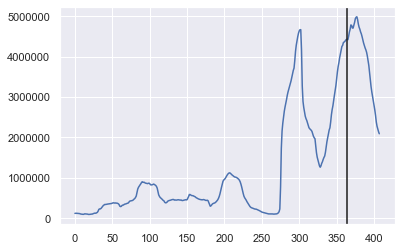

In [91]:
#plt.plot(Data_f['28 Days Organic Reach'])
#plt.plot(Data_f['28 Days Page Consumptions'])
#plt.plot(Data_f['Weekly Organic Reach'])
plt.plot(Data_f['28 Days Page Consumptions'])
plt.axvline(x = 364,color = 'k')


In [90]:
len(Data_f['28 Days Page Consumptions'])


408